<a href="https://colab.research.google.com/github/tanupat92/cs2756_project/blob/main/Copy_of_EDA_DimensionalityReduction_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sklearn.model_selection
import sklearn.linear_model
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Mounted at /content/drive


In [4]:
#import the data
train= pd.read_csv('/content/drive/MyDrive/Datamining/train.csv')
# Only for the competition on kaggle the following import not for our project the test set does not contain sale price


In [5]:
for feature in train.columns:
  print(feature)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [6]:
for feature in train.columns:
    if train[feature].isna().sum() > 200:
        print("Dropped Feature is ",feature)
        train=train.drop(feature,axis=1)

Dropped Feature is  LotFrontage
Dropped Feature is  Alley
Dropped Feature is  FireplaceQu
Dropped Feature is  PoolQC
Dropped Feature is  Fence
Dropped Feature is  MiscFeature


In [7]:
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr, cmap='RdYlGn')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);
    cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

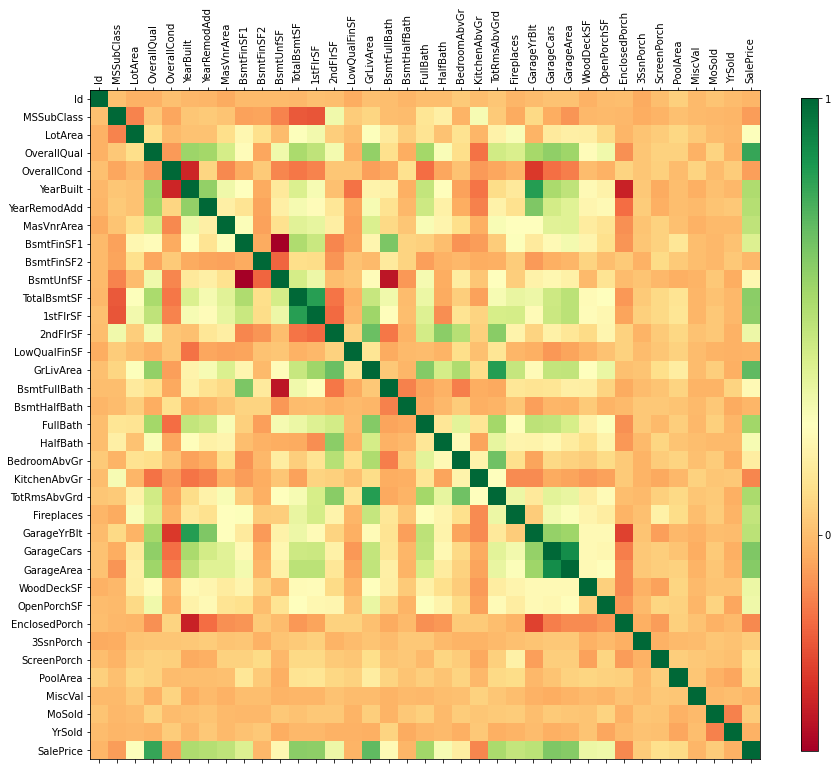

In [ ]:
plot_corr(train,15)

In [8]:
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns

In [9]:
attr_one_hot=['Foundation','Condition2','Exterior2nd','MSSubClass','MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','RoofStyle','RoofMatl','Exterior1st','Heating','CentralAir','Electrical','Functional','GarageType','GarageFinish','GarageCond','PavedDrive','SaleType','SaleCondition','MasVnrType','BsmtExposure','BsmtFinType1','GarageQual','BsmtFinType2','HouseStyle']
ohe=sklearn.preprocessing.OneHotEncoder(sparse=False) 
ohe.fit(train[attr_one_hot])
categorical_Ohe=ohe.transform(train[attr_one_hot])
categorical_Ohe=pd.DataFrame(categorical_Ohe,columns=ohe.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mm = MinMaxScaler()
# SCALE MAPPING
attr_scale_mapped=['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual']
scale_mapper = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0,'NaN':0}
for feature in attr_scale_mapped:
    train[feature] =train[feature].replace(scale_mapper)
train_attr_scale = pd.DataFrame(mm.fit_transform(train[attr_scale_mapped]), columns = attr_scale_mapped)

In [13]:
cont_attr = set(train.columns) - set(attr_one_hot) - set(attr_scale_mapped) - set("Saleprice")

In [14]:
train_cont_mm = mm.fit_transform(train[cont_attr])
train_cont_mm = pd.DataFrame(train_cont_mm, columns=train[cont_attr].columns)

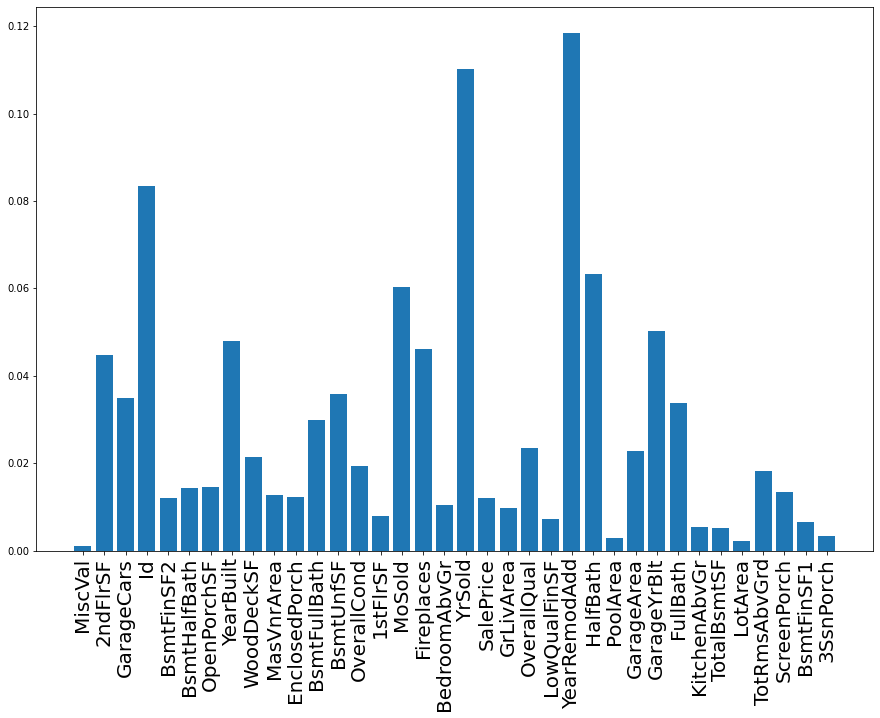

In [15]:
def plot_variance(df, mask=None):
    plt.figure(figsize=(15,10))
    try:
        plt.bar(height=df.var(axis=0), x = train[cont_attr].loc[:,mask].var(axis=0).index)
    except:
        plt.bar(height=df.var(axis=0), x = train[cont_attr].var(axis=0).index)
    plt.xticks(rotation = 90, fontsize=20)
    plt.show()
plot_variance(train_cont_mm)

In [16]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold =0.01)

In [17]:
vt.fit(train_cont_mm)
mask = vt.get_support()
train_cont_reduced = train_cont_mm.loc[:, mask]

In [18]:
train[cont_attr].loc[:,mask].var(axis=0).index.shape

(26,)

In [19]:
train[cont_attr].loc[:, np.invert(mask)].columns

Index(['MiscVal', '1stFlrSF', 'GrLivArea', 'LowQualFinSF', 'PoolArea',
       'KitchenAbvGr', 'TotalBsmtSF', 'LotArea', 'BsmtFinSF1', '3SsnPorch'],
      dtype='object')

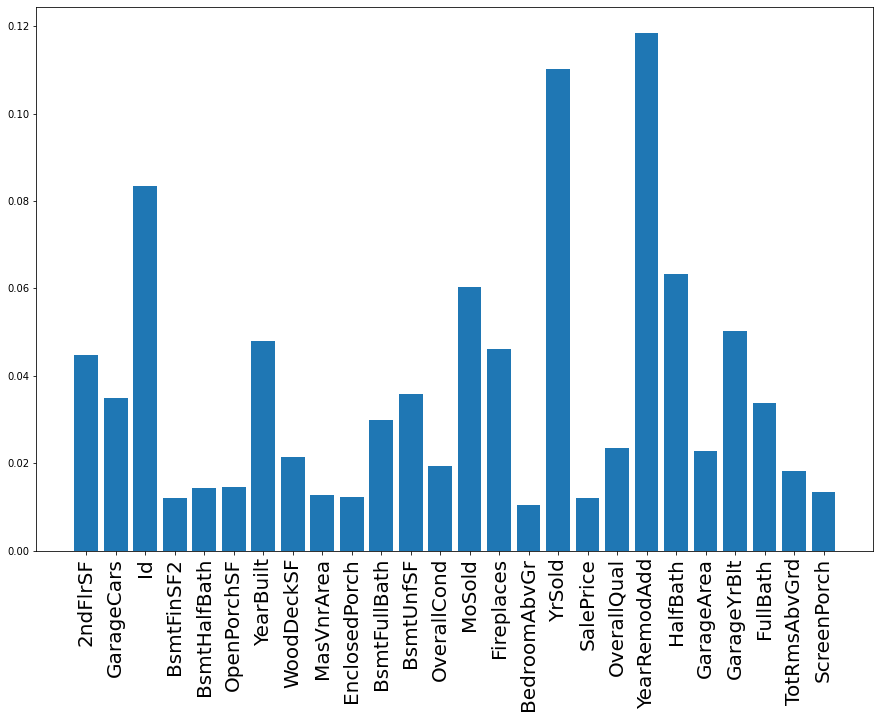

In [20]:
plot_variance(train_cont_reduced, mask)

In [21]:
train_cont_reduced

2ndFlrSF  GarageCars        Id  BsmtFinSF2  BsmtHalfBath  OpenPorchSF  \
0     0.413559        0.50  0.000000    0.000000           0.0     0.111517   
1     0.000000        0.50  0.000685    0.000000           0.5     0.000000   
2     0.419370        0.50  0.001371    0.000000           0.0     0.076782   
3     0.366102        0.75  0.002056    0.000000           0.0     0.063985   
4     0.509927        0.75  0.002742    0.000000           0.0     0.153565   
5     0.274092        0.50  0.003427    0.000000           0.0     0.054845   
6     0.000000        0.50  0.004112    0.000000           0.0     0.104205   
7     0.476029        0.50  0.004798    0.021710           0.0     0.372943   
8     0.364165        0.50  0.005483    0.000000           0.0     0.000000   
9     0.000000        0.25  0.006169    0.000000           0.0     0.007313   
10    0.000000        0.25  0.006854    0.000000           0.0     0.000000   
11    0.553027        0.75  0.007539    0.000000           0.0     0.038391   
12    0.000000        0.25  0.008225    0.000000           0.0     0.000000   
13    0.000000        0.75  0.008910    0.000000           0.0     0.060329   
14    0.000000        0.25  0.009596    0.000000           0.0     0.389397   
15    0.000000        0.50  0.010281    0.000000           0.0     0.204753   
16    0.000000        0.50  0.010966    0.000000           0.0     0.000000   
17    0.000000        0.50  0.011652    0.000000           0.0     0.000000   
18    0.000000        0.50  0.012337    0.000000           0.0     0.186472   
19    0.000000        0.25  0.013023    0.000000           0.0     0.000000   
20    0.589831        0.75  0.013708    0.000000           0.0     0.281536   
21    0.000000        0.25  0.014393    0.000000           0.0     0.000000   
22    0.000000        0.50  0.015079    0.000000           0.0     0.290676   
23    0.000000        0.50  0.015764    0.000000           0.0     0.201097   
24    0.000000        0.25  0.016450    0.453189           0.0     0.164534   
25    0.000000        0.75  0.017135    0.000000           0.0     0.102377   
26    0.000000        0.50  0.017820    0.329715           0.5     0.058501   
27    0.000000        0.75  0.018506    0.000000           0.0     0.091408   
28    0.000000        0.25  0.019191    0.000000           0.0     0.471664   
29    0.000000        0.25  0.019877    0.000000           0.0     0.000000   
30    0.323487        0.25  0.020562    0.000000           0.0     0.098720   
31    0.000000        0.25  0.021247    0.000000           0.0     0.118830   
32    0.000000        0.50  0.021933    0.000000           0.0     0.054845   
33    0.000000        0.50  0.022618    0.000000           0.5     0.069470   
34    0.000000        0.50  0.023304    0.000000           0.0     0.085923   
35    0.639225        0.75  0.023989    0.000000           0.0     0.058501   
36    0.000000        0.50  0.024674    0.000000           0.0     0.117002   
37    0.000000        0.50  0.025360    0.000000           0.5     0.000000   
38    0.000000        0.25  0.026045    0.000000           0.0     0.095064   
39    0.000000        0.00  0.026731    0.000000           0.0     0.000000   
40    0.000000        0.50  0.027416    0.000000           0.0     0.252285   
41    0.000000        0.25  0.028101    0.000000           0.5     0.190128   
42    0.000000        0.50  0.028787    0.063094           0.0     0.000000   
43    0.000000        0.25  0.029472    0.333107           0.0     0.000000   
44    0.000000        0.25  0.030158    0.343284           0.0     0.000000   
45    0.000000        0.50  0.030843    0.000000           0.0     0.149909   
46    0.305569        0.50  0.031528    0.000000           0.0     0.078611   
47    0.000000        0.75  0.032214    0.000000           0.0     0.266910   
48    0.346731        0.00  0.032899    0.000000           0.0     0.000000   
49    0.000000        0.25  0.033585    0.000000        

In [22]:
full_df = pd.concat([train_cont_reduced , train_attr_scale, categorical_Ohe ], axis=1).drop(columns='Id')

In [23]:
#!pip install scikit-learn==1.0.2

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
full_df_imputed = imp.fit_transform(full_df)

In [25]:
pc = PCA()
pc.fit(full_df_imputed)

PCA()

41


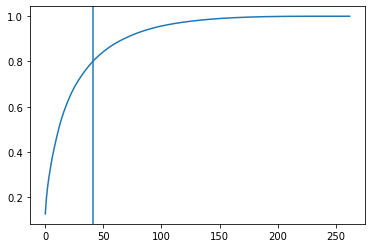

In [26]:
explained_percentage= 0.8
plt.plot(np.cumsum(pc.explained_variance_ratio_))
ind = np.sum(np.cumsum(pc.explained_variance_ratio_) <= explained_percentage)
print(ind)
plt.axvline(x=ind)

In [27]:
pc_array = pc.transform(full_df_imputed)
sp = np.log(train['SalePrice'])
pc_df = pd.concat([pd.DataFrame(pc_array[:,:2]), sp], axis=1)

# Models


In [28]:
pc_subset = pc_array[:,0:40] # pick the top 40components
sklearn.preprocessing.minmax_scale(train['SalePrice'])
target = sklearn.preprocessing.minmax_scale(train['SalePrice'])
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(pc_subset,target ,test_size=0.15)

Baseline model without any dimensionality reduction 


In [29]:
def test_model(model):
  model.fit(x_train,y_train)
  print(model)
  print("r2: ", model.score(x_train,y_train))
  print("MSE: ",sklearn.metrics.mean_squared_error(y_train,model.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))
  print("********")
  print("r2: ", model.score(x_test,y_test))
  print("MSE: ",sklearn.metrics.mean_squared_error(y_test,model.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True))

Lin reg

In [30]:
linreg=sklearn.linear_model.LinearRegression( fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
linreg.fit(x_train,y_train)
linreg.coef_



array([ 0.05936085,  0.00062749,  0.014919  ,  0.00524953,  0.00110042,
        0.04816441,  0.02815794, -0.02310223,  0.0293322 , -0.01491339,
        0.0130769 , -0.00983422,  0.01707756,  0.00278743,  0.01011692,
        0.01419654, -0.00687365,  0.00513234, -0.01998618,  0.02882313,
        0.02342433,  0.00484542, -0.0079029 ,  0.00751399, -0.02311555,
       -0.02897917, -0.02906289,  0.03217416,  0.01395653,  0.01215704,
       -0.02092742,  0.00046552, -0.02449077,  0.00629878, -0.03341991,
        0.0315812 ,  0.00566146, -0.04460157, -0.00158716,  0.02138073])

In [31]:
test_model(linreg)

LinearRegression()
r2:  0.7575317506748165
MSE:  0.0029509672111185017
********
r2:  0.6760105307956776
MSE:  0.003922907207865608


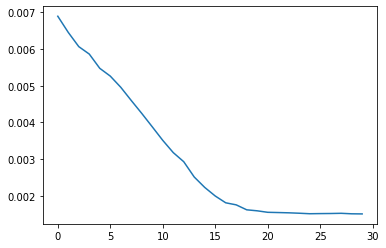

In [32]:
import sklearn.neural_network
ann= sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(40,40,), activation='logistic', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
ann.fit(x_train,y_train)
plt.plot(ann.loss_curve_)

In [33]:
print("r2: ", ann.score(x_train,y_train))
print("MSE: ",sklearn.metrics.mean_squared_error(y_train,ann.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))

r2:  0.754128552154496
MSE:  0.0029923859423311144


In [34]:
print("r2: ", ann.score(x_test,y_test))
print("MSE: ",sklearn.metrics.mean_squared_error(y_test,ann.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True))

r2:  0.6785424316282636
MSE:  0.0038922506187791008


In [ ]:
dt= sklearn.tree.DecisionTreeRegressor( criterion='squared_error', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=5, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)

In [ ]:

print("r2: ", dt.score(x_train,y_train))
print("MSE: ",sklearn.metrics.mean_squared_error(y_train,dt.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))

print("r2: ", dt.score(x_test,y_test))
print("MSE: ",sklearn.metrics.mean_squared_error(y_test,dt.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True))


r2:  0.8563246901822636
MSE:  0.001704852957970324
r2:  0.5921737304388728
MSE:  0.005640769160694286


In [ ]:
import sklearn.ensemble
bag= sklearn.ensemble.BaggingRegressor(base_estimator=dt, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
bag.fit(x_train,y_train)

print("r2: ", bag.score(x_train,y_train))
print("MSE: ",sklearn.metrics.mean_squared_error(y_train,bag.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))

print("r2: ", bag.score(x_test,y_test))
print("MSE: ",sklearn.metrics.mean_squared_error(y_test,bag.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True))


r2:  0.8523299696110579
MSE:  0.0017522543604153555
r2:  0.6858478881175177
MSE:  0.004345133398053655


In [1]:
ens= sklearn.ensemble.RandomForestRegressor(n_estimators=1000, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
ens.fit(x_train,y_train)

print("r2: ", ens.score(x_train,y_train))
print("MSE: ",sklearn.metrics.mean_squared_error(y_train,ens.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))

print("r2: ", ens.score(x_test,y_test))
print("MSE: ",sklearn.metrics.mean_squared_error(y_test,ens.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True))


NameError: ignored

In [ ]:

print(sklearn.metrics.mean_squared_error(y_train,ens.predict(x_train), sample_weight=None, multioutput='uniform_average', squared=True))
sklearn.metrics.mean_squared_error(y_test,ens.predict(x_test), sample_weight=None, multioutput='uniform_average', squared=True)

0.000529723681839494


0.0036542668085777596


# DB scan

In [ ]:
def silhouette_scores(features, method, n_clusters_range=16, params={'metric':'euclidean', 'method':'average'}):
  silhouette = []
  for i in range(1, n_clusters_range):
    if method =='kmeans':
      labels = kmeans_label(features, i+1)
    elif method =='hierarchy':
      labels = hierarchy_label(features, i+1, method=params['method'], metric=params['metric'])
    score = silhouette_score(features, labels)
    silhouette.append(score)
  return silhouette

def elbow_plot(features, method, n_clusters_range=16):
  inertias = []
  for i in range(1,n_clusters_range):
    if method =='kmeans':
      kmean_model = KMeans(n_clusters=i, random_state=42, max_iter=500)
      kmean_model.fit(features)
      labels = kmean_model.predict(features)
      inertias.append(kmean_model.inertia_)
    elif method=='hierarchy': 
      continue
  return plt.plot(range(1,n_clusters_range), inertias, '-o')

def visualize_tsne(dist_mat, hue=None, lr=200, pp=30, random_state=42, n_components=2):
  model = TSNE(n_components= n_components, learning_rate=lr, perplexity=pp, random_state=42)
  tsne_features = model.fit_transform(dist_mat)
  if hue is None:
    df = pd.DataFrame({'xs':tsne_features[:,0], 'ys':tsne_features[:,1]})
    return sns.scatterplot(x='xs', y='ys', data = df)
  else:
    df = pd.DataFrame({'xs':tsne_features[:,0], 'ys':tsne_features[:,1], 'status':hue})
    return sns.scatterplot(x='xs', y='ys', hue='status', data = df)

def kmeans_label(data, n_clusters):
  return KMeans(n_clusters=n_clusters, max_iter=500, random_state=42).fit_predict(data)
 
def hierarchy_label(data, n_clusters, method='average', metric='euclidean'):
  mat = linkage(data, method=method, metric=metric)
  return fcluster(mat, n_clusters, criterion='maxclust')

def dbscan_label(data, eps, min_samples):
  return DBSCAN(eps=eps,min_samples=min_samples).fit_predict(data)

def Dendrogram(data, labels=None):
  mergings = linkage(data, method = 'average')
  if labels is None:
    dendrogram(mergings)
  else:
    dendrogram(mergings,
           labels =labels,
           leaf_rotation =90,
           leaf_font_size=3)
  return None
    
def crosstab(y_known, y_predict, table_type=['absolute','relative']):
  if table_type=='absolute':
    return pd.crosstab(y_known, y_predict)
  elif table_type=='relative':
    return pd.crosstab(y_known, y_predict).apply(lambda r: round(r*100/ r.sum(), 2), axis=0)

def tsne_features(data, learning_rate=316, perplexity=50, n_components=2, random_state=42):
  model = TSNE(learning_rate=learning_rate, perplexity=perplexity, random_state=random_state, n_components=n_components)
  return model.fit_transform(data)


In [ ]:
tsne_features = TSNE(n_components=2,perplexity=38.75, learning_rate=1000,n_jobs=-1, random_state=42).fit_transform(full_df_imputed)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
db_label = dbscan_label(full_df_imputed, eps=0.5, min_samples=2)

In [ ]:
tsne_df = pd.concat([pd.DataFrame(tsne_features), pd.DataFrame(db_label)], axis=1)

In [ ]:
def plot_tsne_cluster(label):
    tsne_df = pd.concat([pd.DataFrame(tsne_features), pd.DataFrame(label)], axis=1)
    tsne_df.columns = [0,1,2]
    g = sns.relplot(
        data=tsne_df,
        x=0, y=1,
        hue=2,
        palette= sns.color_palette("hls", np.size(np.unique(label))),
        sizes=(10, 200),
    )
    g.ax.xaxis.grid(True, "minor", linewidth=.25)
    g.ax.yaxis.grid(True, "minor", linewidth=.25)
    g.despine(left=True, bottom=True)
    plt.show()

    

2.7 3.0 0.23216523690989577


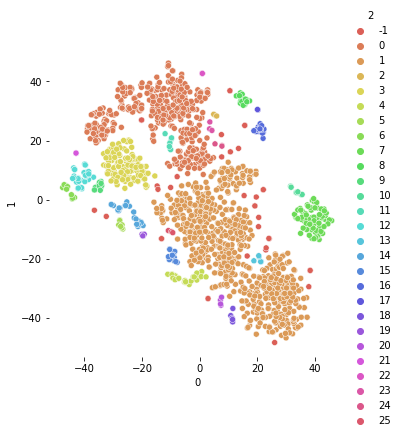

2.7 4.75 0.2009684866154237


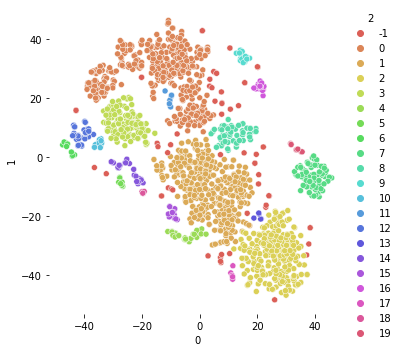

2.7 6.5 0.17932567456992682


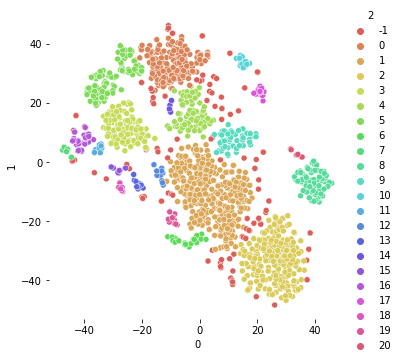

2.7 8.25 0.16633852703555166


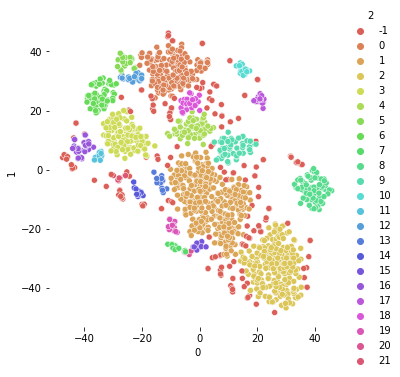

2.7 10.0 0.1717210365160633


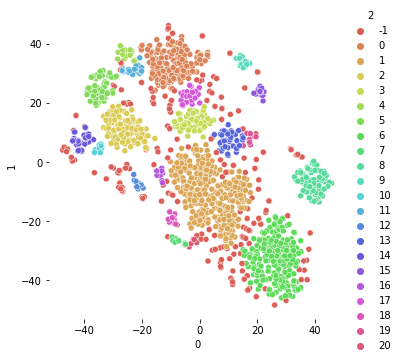

3.0250000000000004 3.0 0.26957096461561997


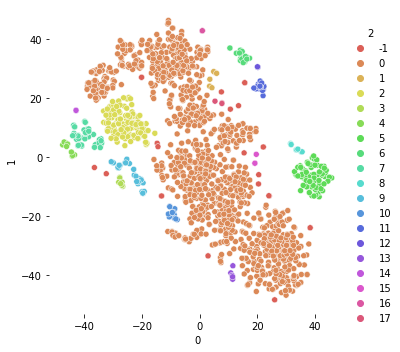

3.0250000000000004 4.75 0.2953023116457912


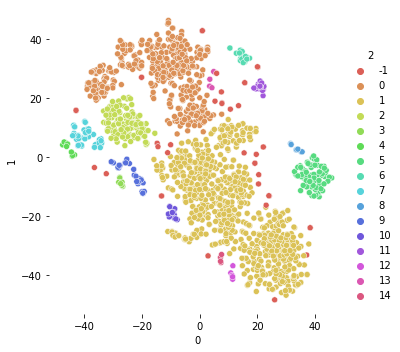

3.0250000000000004 6.5 0.27196890914295196


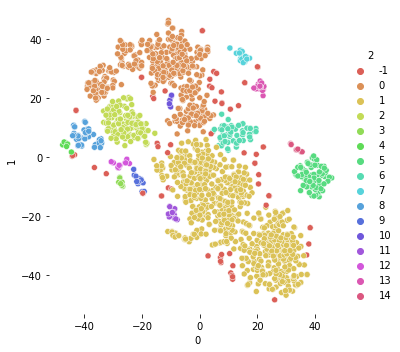

3.0250000000000004 8.25 0.21350048397013044


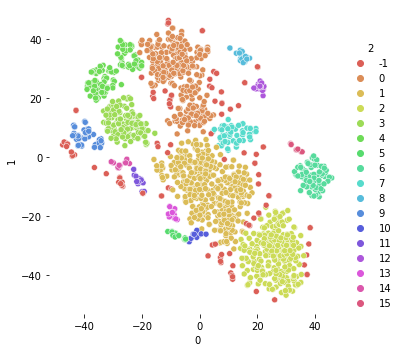

3.0250000000000004 10.0 0.18973395297723827


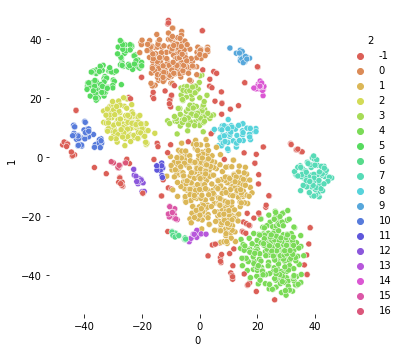

3.35 3.0 0.3040877590831281


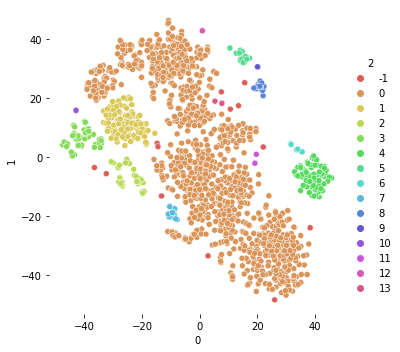

3.35 4.75 0.33704787397249536


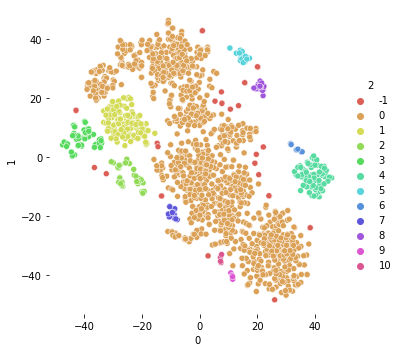

3.35 6.5 0.3451532720413934


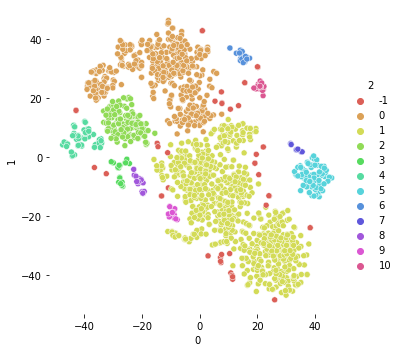

3.35 8.25 0.3406894389241211


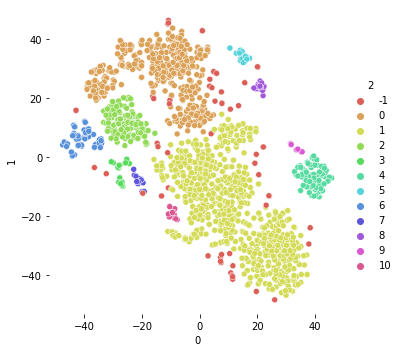

3.35 10.0 0.33524430997678684


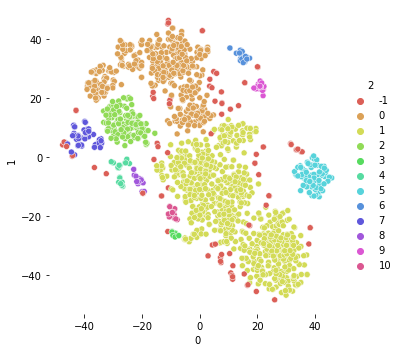

3.675 3.0 0.40923717562168976


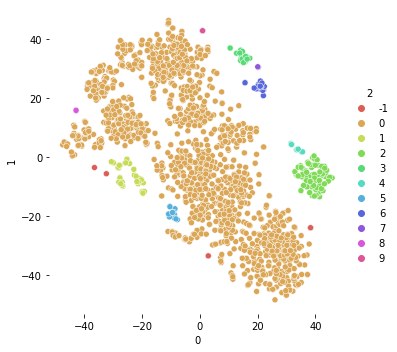

3.675 4.75 0.4236762414463497


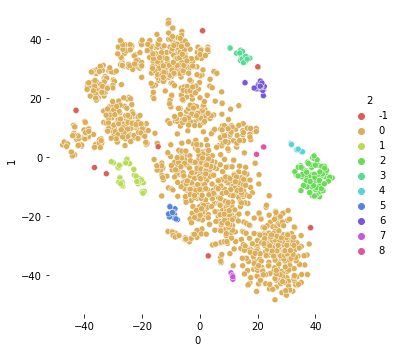

3.675 6.5 0.46473556235323754


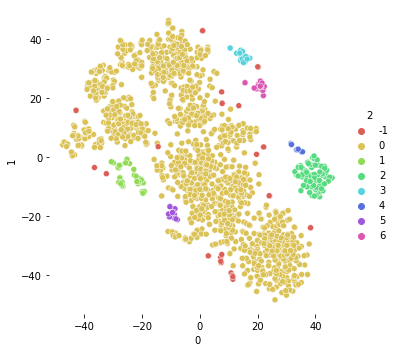

3.675 8.25 0.40638589032163613


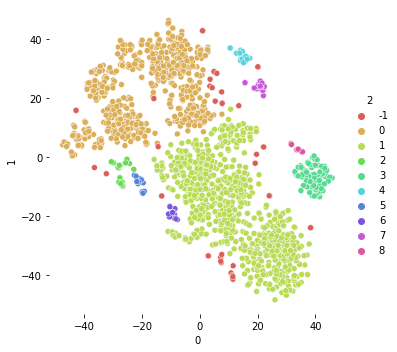

3.675 10.0 0.40240806361778525


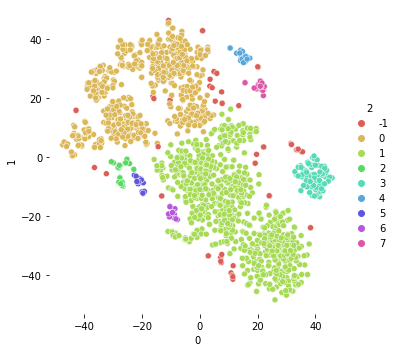

4.0 3.0 0.42709968451467983


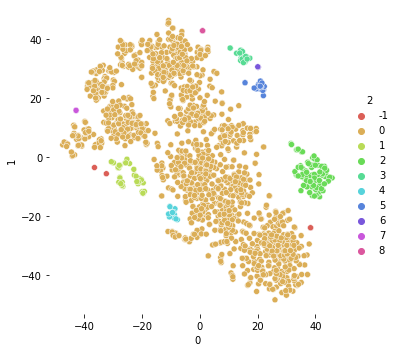

4.0 4.75 0.4710554540412497


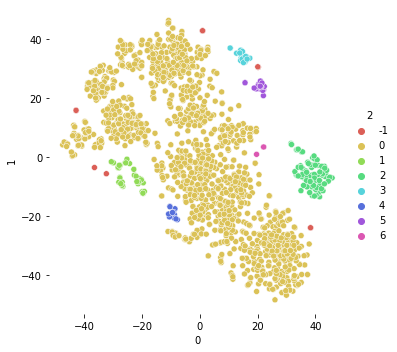

4.0 6.5 0.4991955334157434


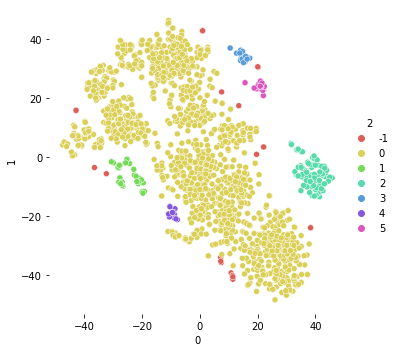

4.0 8.25 0.4420416411759652


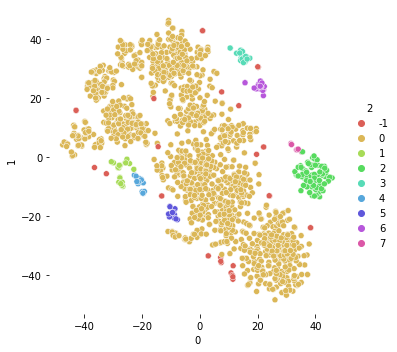

4.0 10.0 0.46031794355427336


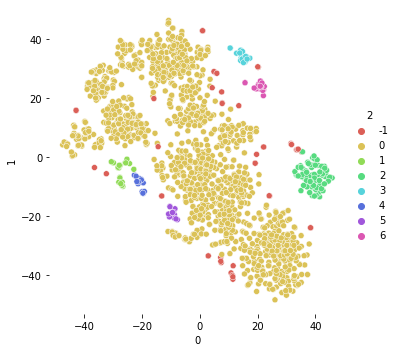

In [ ]:
from sklearn import metrics
for eps in np.linspace(2.7, 4,5):
    for min_sam in np.linspace(3, 10, 5):
        label = dbscan_label(tsne_features, eps=eps, min_samples=min_sam)
        num_cluster = np.size(np.unique(label))
        labels_true = pd.cut(sp, bins=num_cluster, labels=np.arange(num_cluster))
        score = metrics.fowlkes_mallows_score(labels_true, label)
        print(eps, min_sam, score)
        plot_tsne_cluster(label)

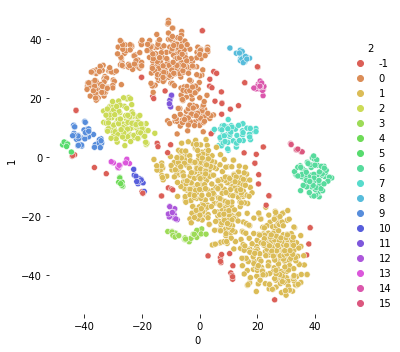

In [ ]:
label = dbscan_label(tsne_features, eps=3, min_samples=6.5)
num_cluster = np.size(np.unique(label))
plot_tsne_cluster(label)

In [ ]:
train.loc[label==5,:]

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
34      35         120       RL     7313   Pave      Reg         Lvl   
45      46         120       RL     7658   Pave      Reg         Lvl   
343    344         120       RL     8849   Pave      IR1         Lvl   
350    351         120       RL     7820   Pave      IR1         Lvl   
640    641         120       RL    12677   Pave      IR1         Lvl   
707    708         120       RL     6240   Pave      Reg         Lvl   
1228  1229         120       RL     8769   Pave      Reg         Lvl   
1264  1265         120       RH     4060   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
34      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
45      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
343     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
350     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
640     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
707     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1228    AllPub    Corner       Gtl      NridgHt       Norm       Norm   
1264    AllPub    Inside       Gtl        NAmes       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
34     TwnhsE     1Story            9            5       2005          2005   
45     TwnhsE     1Story            9            5       2005          2005   
343    TwnhsE     1Story            9            5       2005          2005   
350    TwnhsE     1Story            9            5       2007          2007   
640    TwnhsE     1Story            8            5       2003          2004   
707    TwnhsE     1Story            8            5       2006          2006   
1228   TwnhsE     1Story            9            5       2008          2008   
1264   TwnhsE     1Story            6            5       1998          1999   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
34         Hip  CompShg     MetalSd     MetalSd    BrkFace       246.0   
45         Hip  CompShg     MetalSd     MetalSd    BrkFace       412.0   
343        Hip  CompShg     MetalSd     MetalSd    BrkFace       616.0   
350        Hip  CompShg     MetalSd     MetalSd    BrkFace       362.0   
640        Hip  CompShg     MetalSd     MetalSd    BrkFace       472.0   
707        Hip  CompShg     MetalSd     MetalSd    BrkFace       176.0   
1228       Hip  CompShg     MetalSd     MetalSd    BrkFace       766.0   
1264     Gable  CompShg     MetalSd     MetalSd       None         0.0   

      ExterQual  ExterCond Foundation  BsmtQual  BsmtCond BsmtExposure  \
34            5          3      PConc       5.0       3.0           No   
45            5          3      PConc       5.0       3.0           No   
343           5          3      PConc       5.0       3.0           No   
350           5          3      PConc       5.0       3.0           No   
640           5          3      PConc       5.0       3.0           Gd   
707           4          3      PConc       4.0       3.0           No   
1228          5          3      PConc       5.0       3.0           No   
1264          4          3      PConc       4.0       3.0           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
34            GLQ        1153          Unf           0        408   
45            GLQ         456          Unf           0       1296   
343           GLQ          28          Unf           0       1656   
350           Unf           0          Unf           0       1869   
640           GLQ        1218          Unf           0        300   
707           GLQ         863          Unf           0        461   
1228          GLQ        1540          Unf           0        162   
1264          GLQ         266          Unf           0       1139   

      TotalBsmtSF Heating  Heatin

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

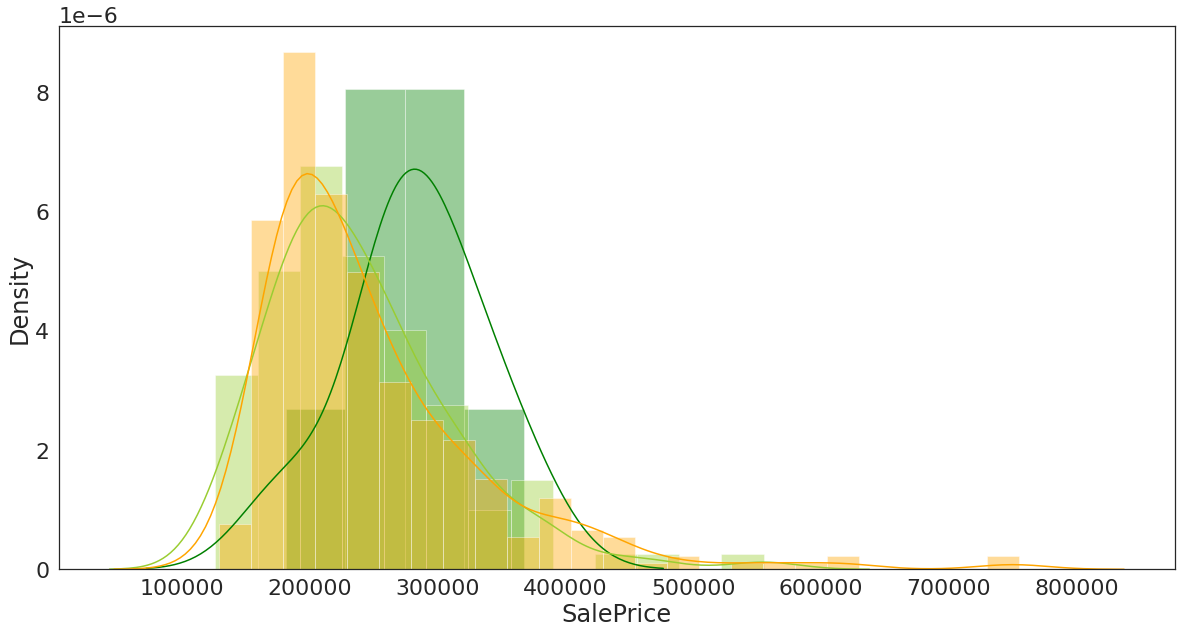

In [ ]:
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.set_style("white")
sns.distplot(train.loc[label==5, 'SalePrice'], color="green")
sns.distplot(train.loc[label==2, 'SalePrice'], color="yellowgreen")
sns.distplot(train.loc[label==0, 'SalePrice'], color="orange")


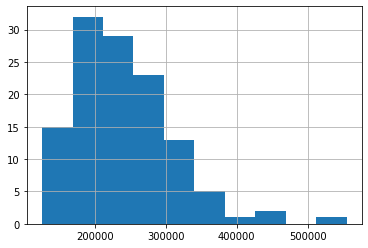

In [ ]:
train.loc[label==2,'SalePrice'].hist()

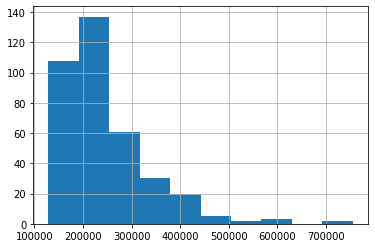

In [ ]:
train.loc[label==0,'SalePrice'].hist()